## Identificando y excluyendo outliers (puntos fuera de la curva o puntos que no tienen ningún sentido)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [2]:
datos = pd.read_csv('alquiler_residencial.csv', sep = ';')
datos.head(100)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,16.67,Departamento
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,Departamento
...,...,...,...,...,...,...,...,...,...,...,...
95,Departamento,Lurín,2,1,0,55,1350.0,430.0,47.0,24.55,Departamento
96,Casa,San Luis,8,3,5,259,7000.0,0.0,0.0,27.03,Casa
97,Departamento,Rímac,3,1,0,85,3900.0,800.0,1211.0,45.88,Departamento
98,Departamento,Lurín,2,0,0,75,3350.0,455.0,0.0,44.67,Departamento


<Axes: >

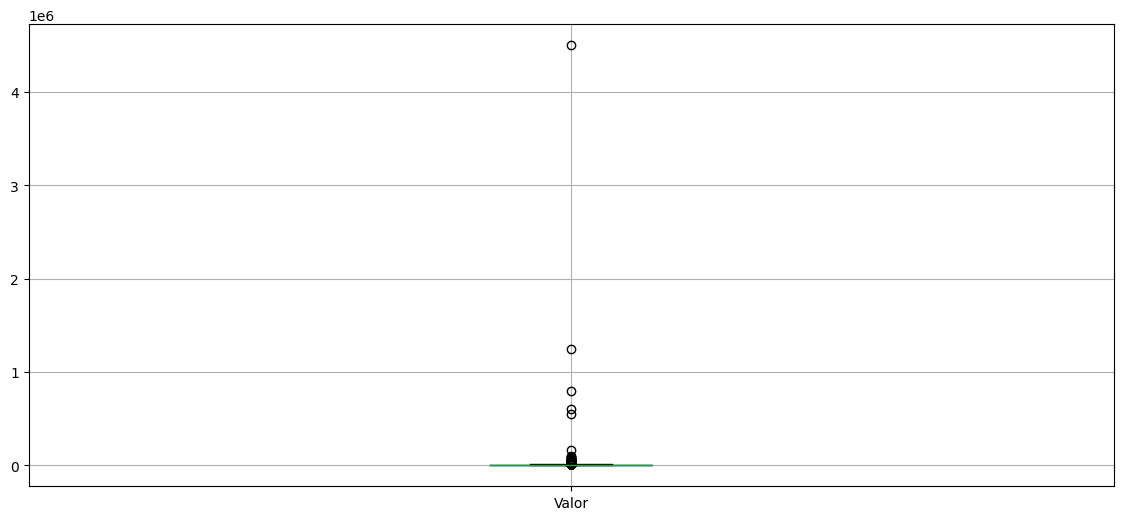

In [3]:
# diagrama de caja
datos.boxplot(['Valor'])
# le6 : es como 1000 000

In [4]:
datos[datos['Valor'] >= 500000]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
7629,Departamento,Ate,1,1,0,65,600000.0,980.0,120.0,9230.77,Departamento
10636,Casa en condominio,Callao,4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Departamento,Callao,2,2,1,150,550000.0,850.0,150.0,3666.67,Departamento
13846,Departamento,Jesús María,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Departamento
15520,Departamento,Chorrillos,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Departamento


In [5]:
valor = datos['Valor']
# cuartil 1 o el 25%
Q1 = valor.quantile(.25)
# cuartil 3 o el 75%
Q3 = valor.quantile(.75)
# Intervalo intercuartil
IIQ = Q3 - Q1

# Limite inferior (separa los valores correctos de los incorrectos)
limite_inferior = Q1 - 1.5 * IIQ
# Limite superior (separa los valores correctos de los incorrectos)
limite_superior = Q3 + 1.5 * IIQ


In [6]:
# toma los valores dentro del limite
seleccion = ((valor >= limite_inferior) & (valor <= limite_superior))


In [7]:
datos_new = datos[seleccion]

<Axes: >

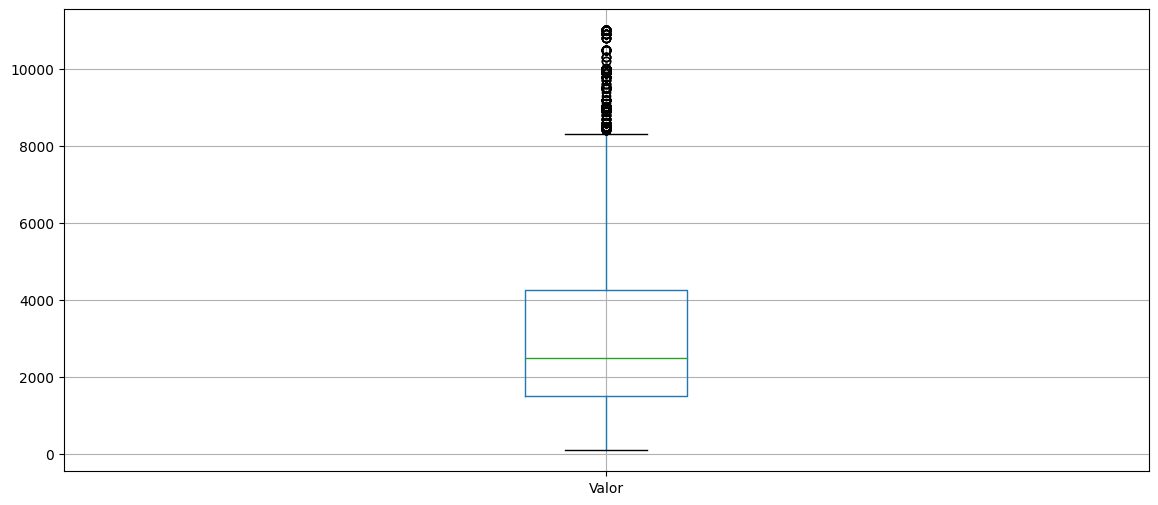

In [8]:
# generando el diagrama de caja
datos_new.boxplot(['Valor'])
# la mayoria de valores se encuentran entre 2000 y 4000

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

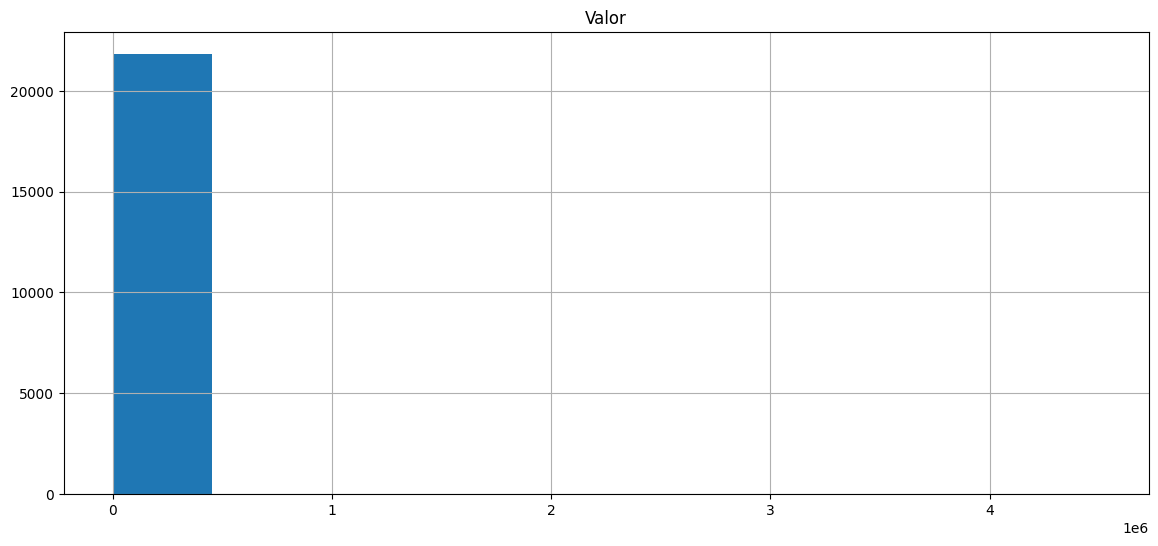

In [9]:
# histograma de datos
datos.hist(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

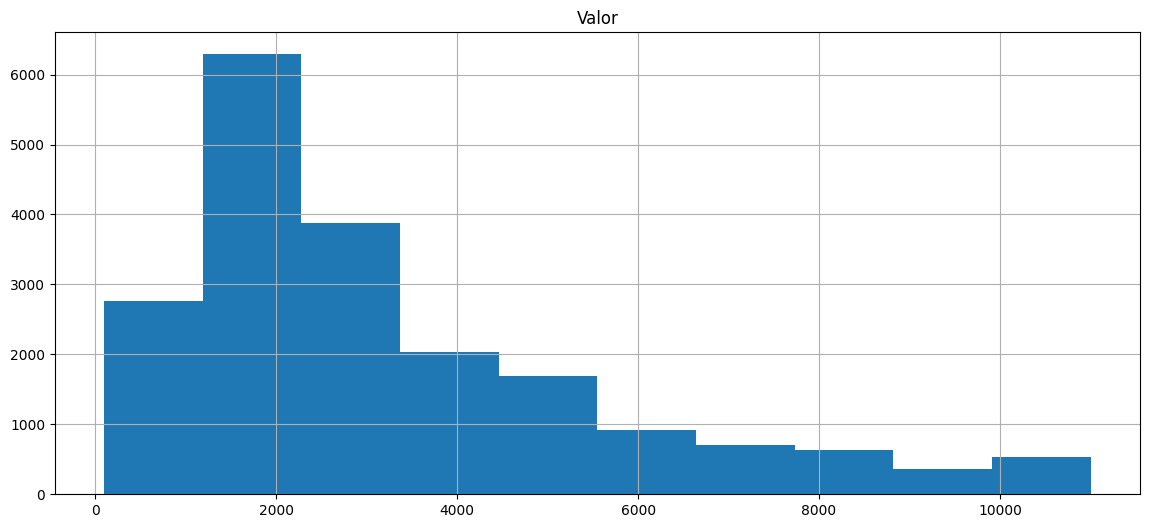

In [10]:
# histograma de datos_new
datos_new.hist(['Valor'])
# el eje vertical es la frecuencia(la mayoria de alquileres esta por los 2000 y la minoria esta por los 10 000)

In [11]:
## Ejercicio

In [12]:
alquiler_muestra = pd.read_csv('alquiler_muestra.csv', sep = ';')
alquiler_muestra

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Departamento,San Borja,3,2,1,320,3200.0,1319.0,0.0,10.00,Departamento
1,Departamento,Lurigancho,2,0,0,59,800.0,725.0,47.0,13.56,Departamento
2,Departamento,Ate,3,2,1,147,7500.0,1000.0,381.0,51.02,Departamento
3,Departamento,Pachacámac,3,3,3,270,14999.0,2800.0,1200.0,55.55,Departamento
4,Departamento,Barranco,2,1,0,65,1200.0,640.0,97.0,18.46,Departamento
...,...,...,...,...,...,...,...,...,...,...,...
9995,Departamento,Santa Rosa,3,1,2,160,15500.0,1600.0,435.0,96.88,Departamento
9996,Departamento,Santa Rosa,4,0,0,190,6000.0,1000.0,0.0,31.58,Departamento
9997,Departamento,Lince,2,1,1,70,2800.0,750.0,160.0,40.00,Departamento
9998,Departamento,Barranco,1,0,0,50,1700.0,360.0,20.0,34.00,Departamento


In [13]:
valor = alquiler_muestra['Valor m2']
# cuartil 1 o el 25%
Q1 = valor.quantile(.25)
# cuartil 3 o el 75%
Q3 = valor.quantile(.75)
# Intervalo intercuartil
IIQ = Q3 - Q1

# Limite inferior (separa los valores correctos de los incorrectos)
limite_inferior = Q1 - 1.5 * IIQ
# Limite superior (separa los valores correctos de los incorrectos)
limite_superior = Q3 + 1.5 * IIQ

In [14]:
print('[Q1] -> {}'.format(Q1))
print('[Q3] -> {}'.format(Q3))
print('[IIQ] -> {}'.format(IIQ))
print('[Q1 - 1.5 * IIQ] -> {}'.format(limite_inferior))
print('[Q3 + 1.5 * IIQ] -> {}'.format(limite_superior))

[Q1] -> 21.25
[Q3] -> 42.31
[IIQ] -> 21.060000000000002
[Q1 - 1.5 * IIQ] -> -10.340000000000003
[Q3 + 1.5 * IIQ] -> 73.9


<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

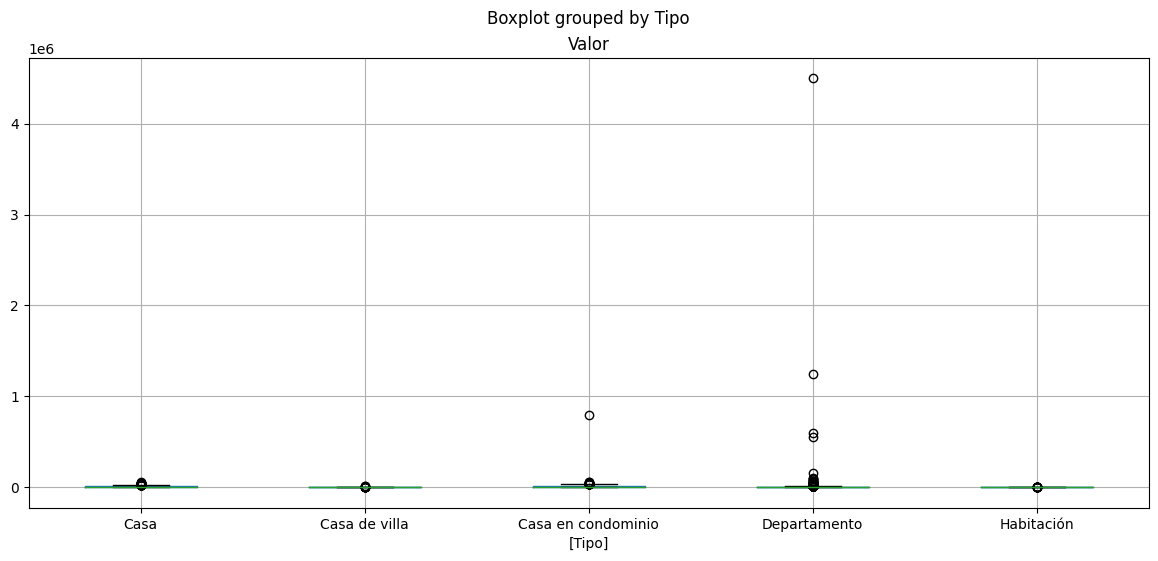

In [16]:
# generando boxplot de la columna Valor agrupando por una columna Tipo, no están limpios los datos(hay datos fuera de los limites)
datos.boxplot(['Valor'], by = ['Tipo'])

In [20]:

# agrupando por Tipo y se obtiene la columna Valor
grupo_tipo = datos.groupby('Tipo')['Valor']

In [21]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [ ]:
grupo_tipo.groups

In [24]:
# generando los limites para cada tipo
# cuartil 1 o el 25%
Q1 = grupo_tipo.quantile(.25)
# cuartil 3 o el 75%
Q3 = grupo_tipo.quantile(.75)
# Intervalo intercuartil
IIQ = Q3 - Q1

# Limite inferior (separa los valores correctos de los incorrectos)
limite_inferior = Q1 - 1.5 * IIQ
# Limite superior (separa los valores correctos de los incorrectos)
limite_superior = Q3 + 1.5 * IIQ

In [26]:
limite_inferior

Tipo
Casa                 -11950.0
Casa de villa          -825.0
Casa en condominio   -12875.0
Departamento          -3250.0
Habitación                0.0
Name: Valor, dtype: float64

In [27]:
limite_superior

Tipo
Casa                  22850.0
Casa de villa          3375.0
Casa en condominio    32125.0
Departamento           9950.0
Habitación             2400.0
Name: Valor, dtype: float64

In [29]:
# limpiando los datos de la columna 'Valor' de los datos que estan fuera del limite, están agrupados por tipo
# ahora todos los datos que se muestran están dentro de los límites, pero fuera de la concentración de los datos
datos_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
  eh_tipo = datos['Tipo'] == tipo
  eh_dentro_limite = (datos['Valor'] >= limite_inferior[tipo]) & (datos['Valor'] <= limite_superior[tipo])
  seleccion = eh_tipo & eh_dentro_limite
  datos_seleccion = datos[seleccion]
  datos_new = pd.concat([datos_new, datos_seleccion])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

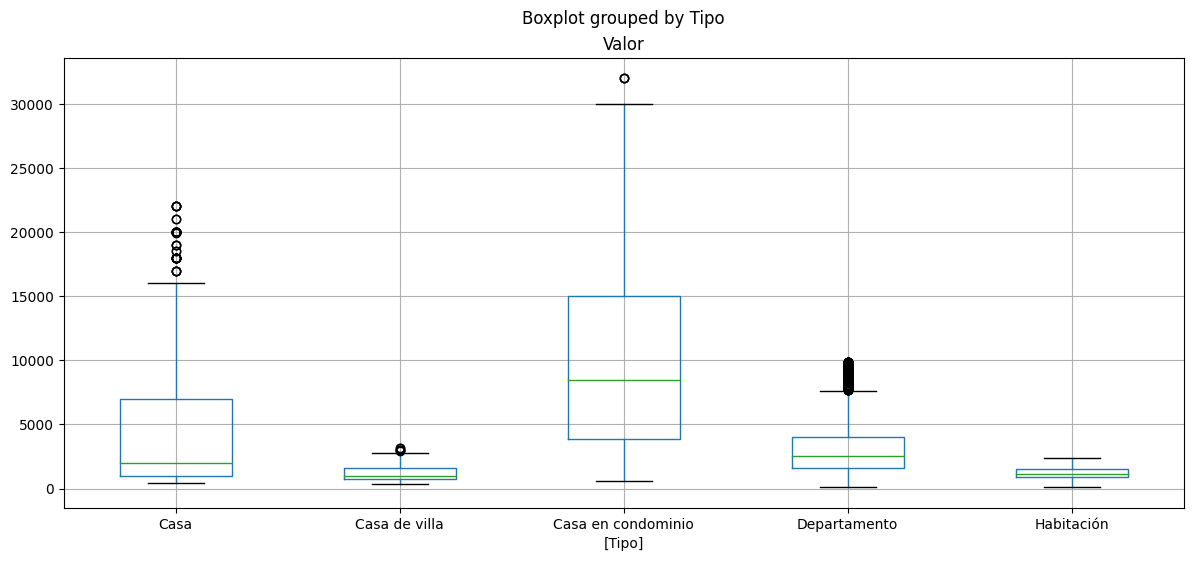

In [30]:
datos_new.boxplot(['Valor'], by = ['Tipo'])

In [31]:
# exportando a csv
datos_new.to_csv('alquiler_residencial_sin_outliers.csv', sep = ';', index = False)